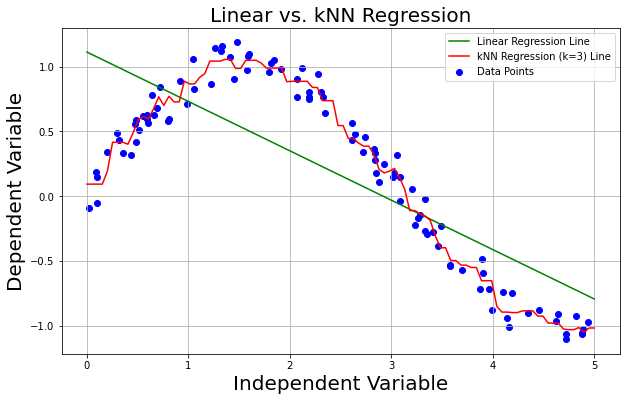

Linear Regression R^2: 0.43
Optimal k for kNN: 3
kNN Regression R^2: 0.96


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Generate synthetic data with a nonlinear relationship
points=100
np.random.seed(0)
X = np.sort(5 * np.random.rand(points, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(points)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

# kNN Regression with cross-validation to find the optimal k
best_k = None
best_r2 = -1

for k in range(1, 11):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    r2_scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='r2')
    mean_r2 = np.mean(r2_scores)
    
    if mean_r2 > best_r2:
        best_k = k
        best_r2 = mean_r2

# Train the kNN regression with the best k value
best_knn_reg = KNeighborsRegressor(n_neighbors=best_k)
best_knn_reg.fit(X_train, y_train)
knn_pred = best_knn_reg.predict(X_test)

# Calculate R^2 for both models
linear_r2 = r2_score(y_test, linear_pred)
knn_r2 = r2_score(y_test, knn_pred)

# Generate a range of X values for the regression lines
X_range = np.linspace(0, 5, 100).reshape(-1, 1)

# Predict the Y values for the regression lines
linear_regression_line = linear_reg.predict(X_range)
knn_regression_line = best_knn_reg.predict(X_range)

# Plot the data points and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', label='Data Points')
plt.plot(X_range, linear_regression_line, color='g', label='Linear Regression Line')
plt.plot(X_range, knn_regression_line, color='r', label=f'kNN Regression (k={best_k}) Line')
plt.xlabel("Independent Variable", fontsize=20)
plt.ylabel("Dependent Variable", fontsize=20)
plt.grid(True)
plt.legend()
plt.title("Linear vs. kNN Regression", fontsize=20)
plt.show()

print(f"Linear Regression R^2: {linear_r2:.2f}")
print(f"Optimal k for kNN: {best_k}")
print(f"kNN Regression R^2: {knn_r2:.2f}")